In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
MasterData=pd.read_csv('AB_NYC_2019.csv')
MasterData.head(5)#Check the structure of the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
nullcount=MasterData[MasterData['neighbourhood_group']==np.nan].count()#identify empty rows
print(nullcount)
print(MasterData.shape)
print(MasterData[['id']].nunique())#identify any duplications

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
(48895, 16)
id    48895
dtype: int64


Airbnb is a world-famous platform for providing short-tern homestays and were widely used by travellers. The data of Airbnb homestays in New York city in 2019 is avalible on Kaggle, which can be used for the purpose of data analysis that support business decisions. According to the chart above, this dataset list out the hosts in New York city, where each host were assigned an unique id, with other informations provided in the dataset, including price, reviews, and geographic location.

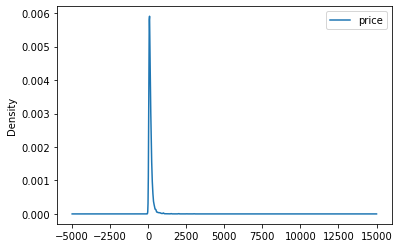

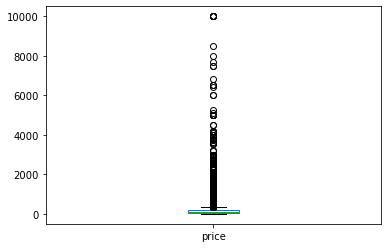

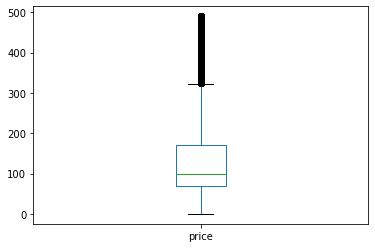

In [5]:
MasterData[['price']].plot(kind='kde')#Identify the distribution, find out possibility of overly high price(which acts as outliers)
MasterData[['price']].plot(kind='box')#Outliers identified
Q1 = MasterData['price'].quantile(0.25)
Q3 = MasterData['price'].quantile(0.75)
IQR = Q3 - Q1
Extr=(Q3+3*IQR)
Master2=MasterData[MasterData['price']<=Extr]#removing extreme outliers
Master2[['price']].plot(kind='box')#check if the outliers are removed


From the distribution Graph of room price per day, a clustering in <2500 is discovered, suggesting existance of outliers, which can be identified from box plot. Extreme outliers are then eliminated for the purpose of analyzation

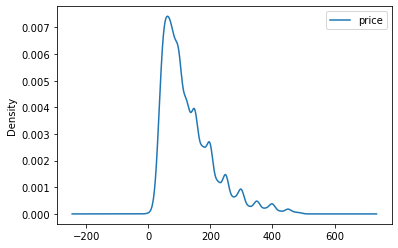

In [6]:
Master2[['price']].plot(kind='kde')

After removing extreme outliers, the distribution of price is clearly shown. The peak of the distribution curve lies on circa 100 USD/night, where it graduately goes down until circa 500 USD. From the graph, one can easily tell that most of the hosts have a price between 0 to 200 USD/night.

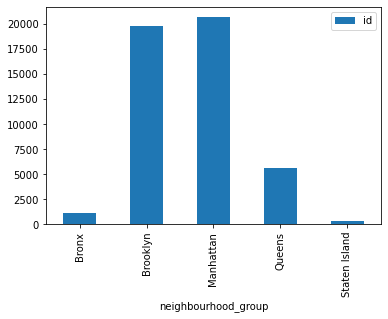

In [7]:
District=Master2[['id','neighbourhood_group']].groupby(by='neighbourhood_group').count()
District.plot(kind='bar')

From the graph plotting numbers of hosts in each neighbourhood group, it can be easily seen that Manhattan has the largest amount of hosts and most hosts are located in Manhattan and Brooklyn.

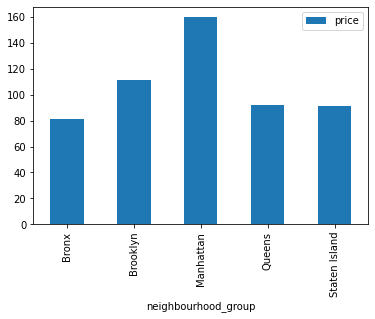

In [8]:
District_price=Master2[['price','neighbourhood_group']].groupby(by='neighbourhood_group').mean()
District_price.plot(kind='bar')

For average price across neighbourhood groups, Manghattan has the highest average price and Brooklyn is at the second place, which is in accordance to expectation since Manhattan is widely accepted as the most expensive area in New York.

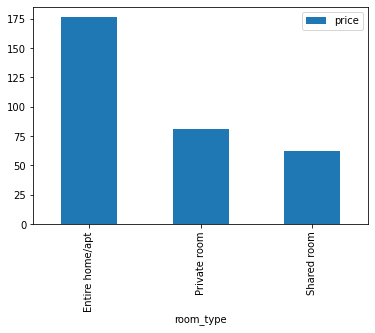

In [9]:
Room_price=Master2[['price','room_type']].groupby(by='room_type').mean()
Room_price.plot(kind='bar')

The rooms hosts provided are catogrized into 3 groups, among those three groups, entire home/apartment has the highest average price at circa 175 USD/night

In [10]:
Table1=Master2[['id','neighbourhood_group','room_type']].pivot_table(index='neighbourhood_group',columns='room_type',aggfunc='count')
Table1

id                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                           375          648          59
Brooklyn                       9309        10088         412
Manhattan                     12345         7861         475
Queens                         2071         3363         194
Staten Island                   170          188           9

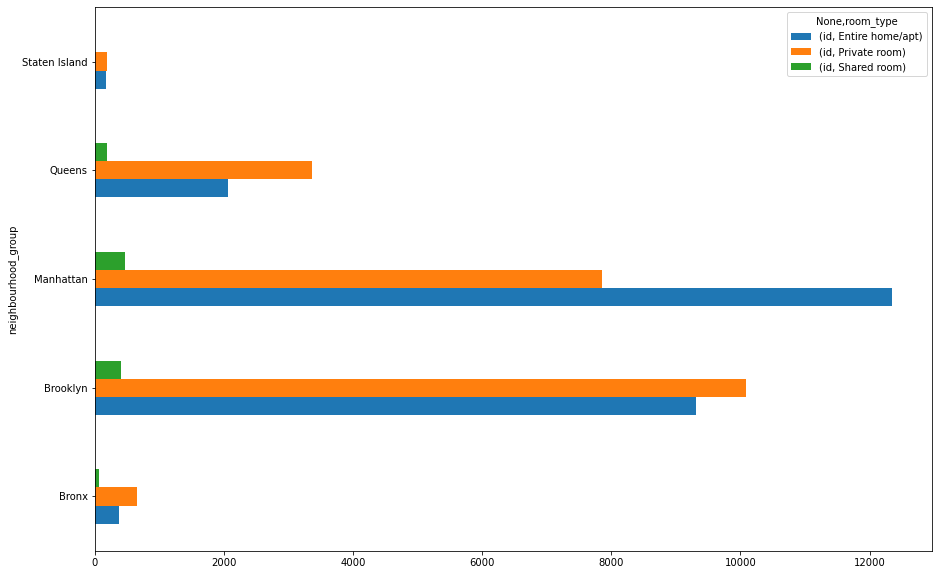

In [11]:
Table1.plot(kind='barh',figsize=(15,10))

In all neighbour groups except for Manhattan, private room appears to be the most popular and shared room the least. However, there are far more Entire room/apt in Manhattan than private rooms. 

In [12]:
Table2=Master2[['price','neighbourhood_group','room_type']].pivot_table(index='neighbourhood_group',columns='room_type')
Table2

price                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                    121.480000    60.595679   47.254237
Brooklyn                 157.697067    71.113402   48.890777
Manhattan                199.579182   102.233304   82.334737
Queens                   137.531627    66.892061   46.989691
Staten Island            124.835294    62.292553   57.444444

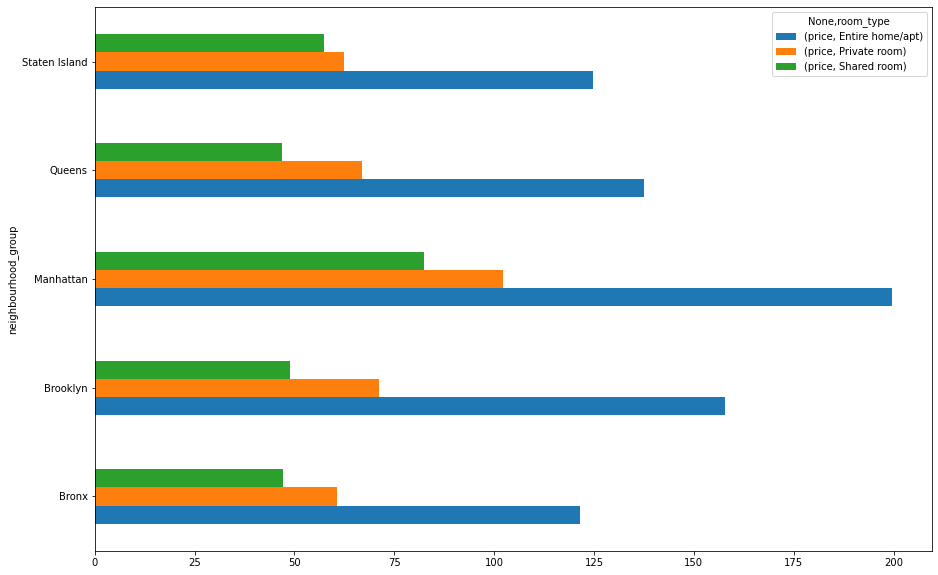

In [13]:
Table2.plot(kind='barh',figsize=(15,10))


Distribution of price is similliar across all neighbour groups, where Manhatten has a significantly higher price in all types of rooms

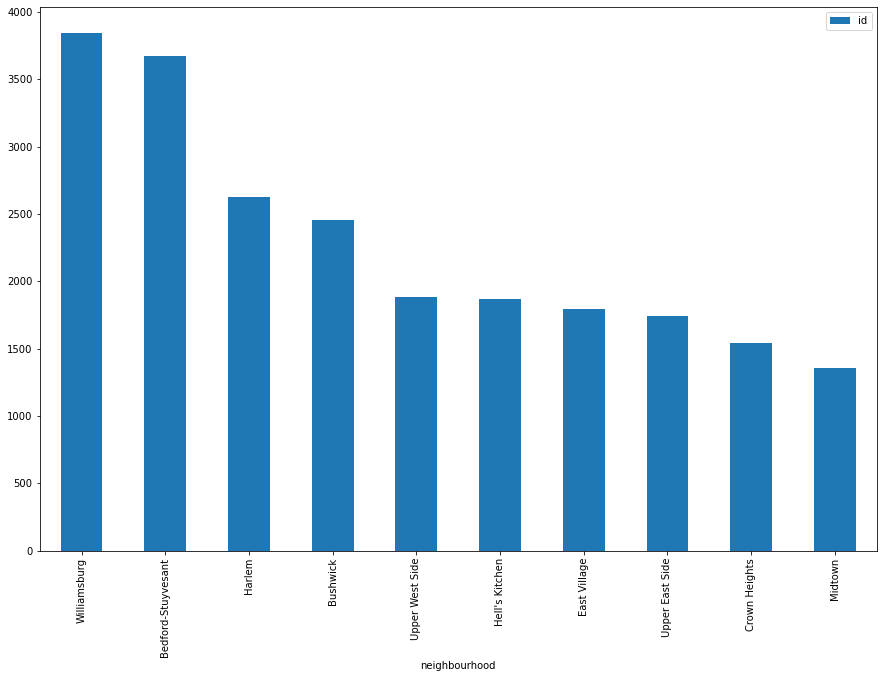

In [14]:
PopNeighbourhood=Master2[['id','neighbourhood']].groupby(by='neighbourhood').count()
PopNeighbourhood.sort_values(by='id',ascending=False,inplace=True)
PopNeighbourhood=PopNeighbourhood.head(10)
PopNeighbourhood.plot(kind='bar',figsize=(15,10))

<Figure size 432x288 with 0 Axes>

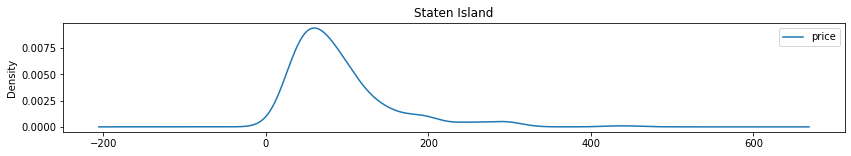

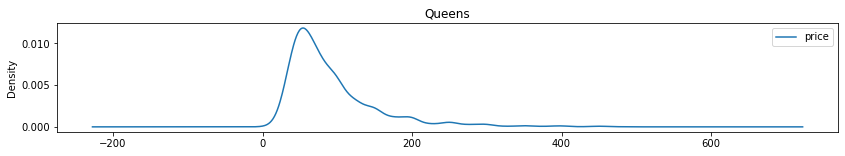

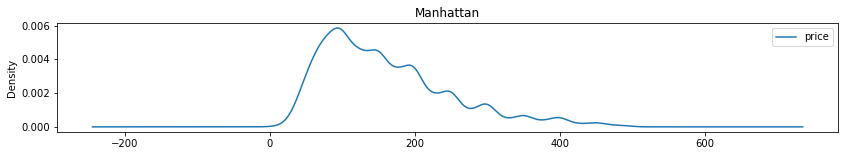

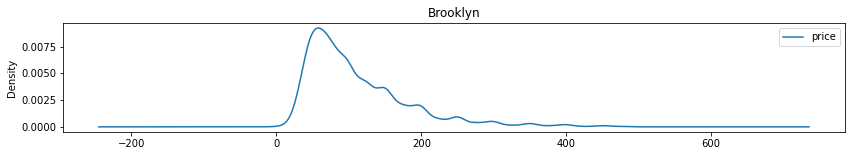

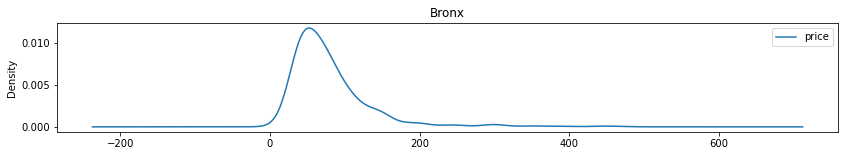

In [15]:
Statdist=Master2[Master2['neighbourhood_group']=='Staten Island']
Queendist=Master2[Master2['neighbourhood_group']=='Queens']
Mandist=Master2[Master2['neighbourhood_group']=='Manhattan']
Brookdist=Master2[Master2['neighbourhood_group']=='Brooklyn']
Bronxdist=Master2[Master2['neighbourhood_group']=='Bronx']

fig=plt.figure()
axs = fig.subplots(nrows=5, ncols=0)
axs[0]=Statdist[['price']].plot(kind='kde',figsize=(14,2),title='Staten Island')
axs[1]=Queendist[['price']].plot(kind='kde',figsize=(14,2),title='Queens')
axs[2]=Mandist[['price']].plot(kind='kde',figsize=(14,2),title='Manhattan')
axs[3]=Brookdist[['price']].plot(kind='kde',figsize=(14,2),title='Brooklyn')
axs[4]=Bronxdist[['price']].plot(kind='kde',figsize=(14,2),title='Bronx')
plt.show()

Distribution of price is similliar for all other districts except for Manhattan is similliar, where peak occured at <100 and cluster appears between 0-200. For manhattan, the cluster is not as significant where a portion of data occured between 200-400, explained its high average price

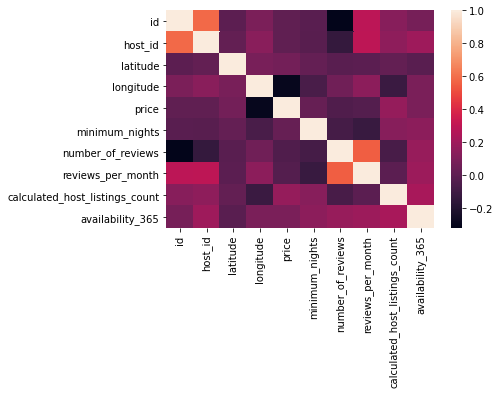

In [16]:
corr=Master2.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [17]:
Master2.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.585854,-0.005027,0.094106,0.008955,-0.014757,-0.320530,0.290162,0.132509,0.081185
host_id,0.585854,1.000000,0.018242,0.134210,0.004929,-0.019144,-0.138494,0.295385,0.152157,0.200107
latitude,-0.005027,0.018242,1.000000,0.086965,0.070323,0.024633,-0.013800,-0.010042,0.019789,-0.013266
longitude,0.094106,0.134210,0.086965,1.000000,-0.295411,-0.064209,0.056959,0.147922,-0.115309,0.091157
price,0.008955,0.004929,0.070323,-0.295411,1.000000,0.029665,-0.045880,-0.029493,0.174666,0.089379
minimum_nights,-0.014757,-0.019144,0.024633,-0.064209,0.029665,1.000000,-0.080334,-0.121848,0.129808,0.145544
number_of_reviews,-0.320530,-0.138494,-0.013800,0.056959,-0.045880,-0.080334,1.000000,0.552395,-0.072447,0.178281
reviews_per_month,0.290162,0.295385,-0.010042,0.147922,-0.029493,-0.121848,0.552395,1.000000,-0.010422,0.190517
calculated_host_listings_count,0.132509,0.152157,0.019789,-0.115309,0.174666,0.129808,-0.072447,-0.010422,1.000000,0.228629
availability_365,0.081185,0.200107,-0.013266,0.091157,0.089379,0.145544,0.178281,0.190517,0.228629,1.000000


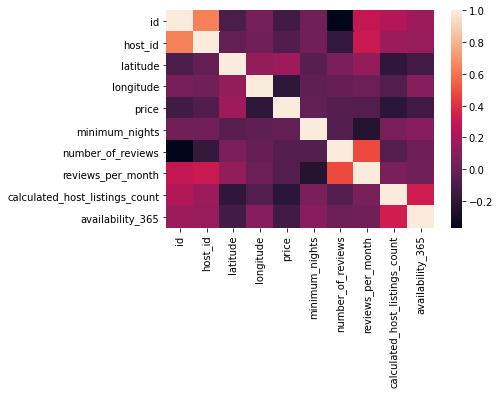

In [18]:
corrEnt=Master2[Master2['room_type']=='Entire home/apt'].corr()
corrPri=Master2[Master2['room_type']=='Private room'].corr()
corrShar=Master2[Master2['room_type']=='Shared room'].corr()
sns.heatmap(corrShar,xticklabels=corrShar.columns.values,yticklabels=corrShar.columns.values)

Overall in the dataset no strong correlation is observed, notable that for shared rooms, a relatively larger corrlation between calculated host listing count and avalibility is abserved

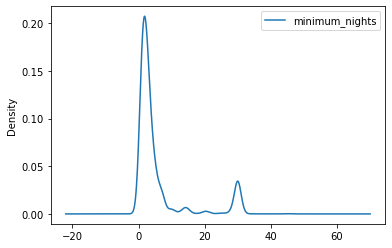

In [19]:
Master2[Master2['minimum_nights']<50][['minimum_nights']].plot(kind='kde')

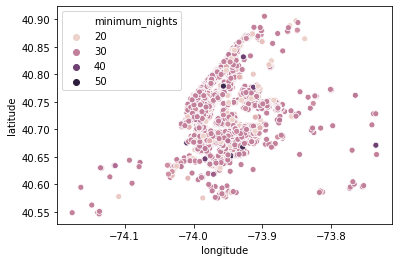

In [20]:

sns.scatterplot(x='longitude', y='latitude', hue='minimum_nights', data=Master2[(Master2['minimum_nights']<50)&(Master2['minimum_nights']>=20)])

Noticeable that the distribution of minimum nights has two peaks at 0~10 and ~30, indicated the occurance of hosts who rent their houses in monthly basis.Those hosts are more found in Manhattan, Brooklyn and western part of Queens

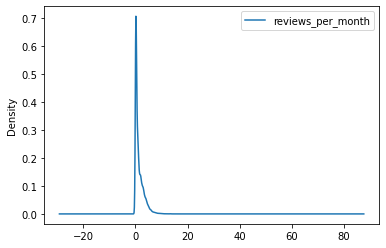

In [21]:
Master2[['reviews_per_month']].plot(kind='kde')

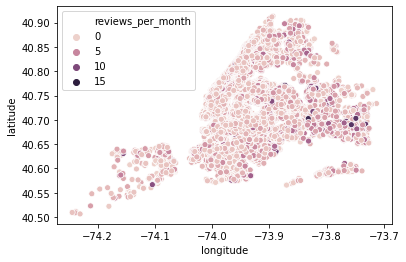

In [22]:
sns.scatterplot(x='longitude', y='latitude', hue='reviews_per_month', data=Master2[Master2['reviews_per_month']<15])

Number of distribution of munimum nights clustered at 1~10, datapoints over 15 can be regarded as outliers. Noticable that hosts with the most reviews per month is found more in east of Queens, South Brooklyn and Bronx, which is, largly, the opposite distribution of monthly-based hosts.Noticable that resident area in east of Queens mainly consists of mansions which is significantly different from other areas of New York, suggesting a possible link 

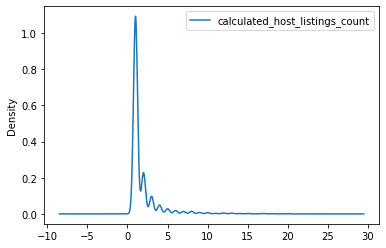

In [23]:
Master2[Master2['calculated_host_listings_count']<=20][['calculated_host_listings_count']].plot(kind='kde')

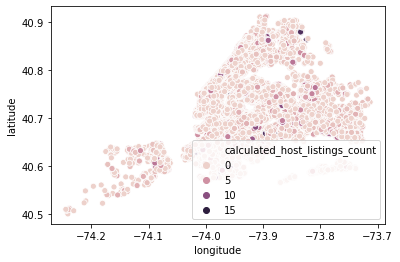

In [24]:
sns.scatterplot(x='longitude', y='latitude', hue='calculated_host_listings_count', data=Master2[Master2['calculated_host_listings_count']<=15])

Number of distribution of munimum nights clustered at 1~15, datapoints over 15 can be regarded as outliers for clarify the analysis.A pattern can be noticed that the datapoints with larger host listing count can be found on the border of Brooklyn, between east wnd west Queens, and Bronx. Since those locations are close to the terminal stations of New york underground, a possible connection can be raised.

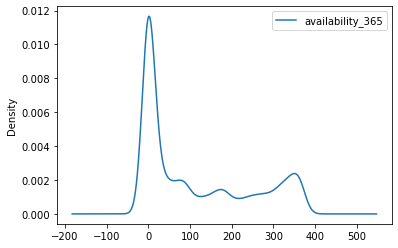

In [25]:
Master2[['availability_365']].plot(kind='kde')

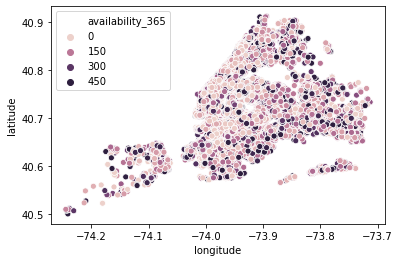

In [26]:
sns.scatterplot(x='longitude', y='latitude', hue='availability_365', data=Master2)

Most hosts are avaliable for less then 200 days per year, the map shows that the avaliability is lower in manhattan and west brooklyn, which agrees with the distribution of reviews per month.

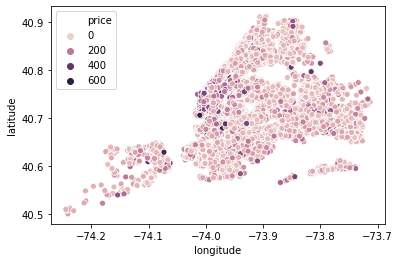

In [27]:
sns.scatterplot(x='longitude', y='latitude', hue='price', data=Master2)

For the roomprice, cluster can be found in Manhattan and its surroundings, while high priced rooms can be found elsewhere, its pattern of distribution is scattered

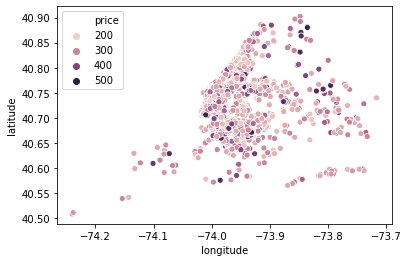

In [28]:
sns.scatterplot(x='longitude', y='latitude', hue='price', data=Master2[Master2['price']>200])

Notably that the distribution of price over 200 USD/night is similliar to the distribution of monthly rent rooms

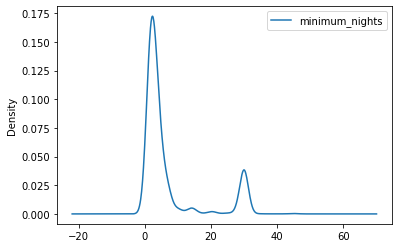

In [29]:
Master2[(Master2['minimum_nights']<50)&(Master2['room_type']=='Entire home/apt')][['minimum_nights']].plot(kind='kde')

Note that the distribution of minimum nights for Entire room/apt which has the highest average price has a slightly higher peak on circa 30 nights then the general distribution, so we can not rull out discrimination caused by room type.

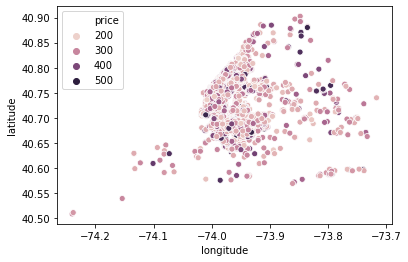

In [31]:
sns.scatterplot(x='longitude', y='latitude', hue='price', data=Master2[(Master2['room_type']=='Entire home/apt')&(Master2['price']>200)])

A similliar distribution can be seen when the room type is narrowed to Entire home/apt, showing that such distribution is mainly due to room type.

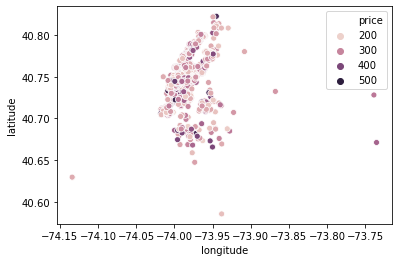

In [36]:
sns.scatterplot(x='longitude', y='latitude', hue='price', data=Master2[(Master2['room_type']=='Entire home/apt')&(Master2['minimum_nights']>=20)&(Master2['price']>200)])

Overlapping between high price rooms and monthly rent rooms can be found mainly in Manhattan and its surroundings.

In [52]:
from  sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
Master3=Master2.dropna()
km.fit(Master3[['price','minimum_nights','reviews_per_month','availability_365','calculated_host_listings_count']])

KMeans(n_clusters=3)

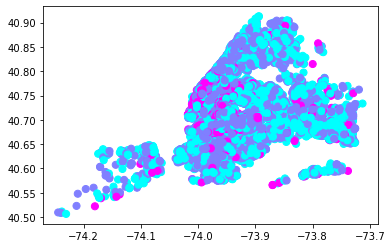

In [53]:
label_pred = km.labels_  
centroids = km.cluster_centers_
plt.scatter(Master3['longitude'], Master3['latitude'], c=label_pred, s=50, cmap='cool')

Based on K-means Algorism, it is visible that based on price, reviews per month, avalibility and calculated host listing count, the hosts in Manhattan and its surroundings is showing distinct features against other hosts, which makes it an indicidual type. 